In [1]:
import pandas as pd
import sys
import matplotlib

In [2]:
water23 = pd.read_csv("../data/waterlevel/Water23.csv", index_col='date')

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
climate = pd.read_csv("../data/waterlevel/ClimateWater.csv", index_col='date')

In [5]:
climate

,Temp(C),Rainfall(mm),Moisture(%),SurfaceTemp(surC),WaterH1
date,,,,,
2015-01-01,-3.9,0.2,62.9,-1.8,39.30
2015-01-02,-4.3,2.4,74.8,-0.8,39.34
2015-01-03,-1.1,NaN,69.4,0.3,39.34
2015-01-04,3.1,NaN,87.6,2.6,39.34
2015-01-05,5.5,13.5,77.4,3.1,39.42
2015-01-06,0.0,2.5,66.3,1.9,39.47
2015-01-07,-3.0,NaN,53.9,-3.0,39.53
2015-01-08,-2.3,NaN,73.0,-1.9,39.56
2015-01-09,0.4,0.0,80.9,0.1,39.59


In [6]:
newindex = []
for ind in water23.index:
    newindex.append(ind.split()[0])

In [7]:
vals, inds = np.unique(newindex, return_inverse=True)

In [8]:
upperh_med = np.ones(vals.size)*np.nan
downh_med = np.ones(vals.size)*np.nan
upperh_std = np.ones(vals.size)*np.nan
downh_std = np.ones(vals.size)*np.nan

for i in range (vals.size):
    active = inds==i
    upperh_med[i] = np.median(water23["upperlevel"].values[active])
    downh_med[i] = np.median(water23["downlevel"].values[active])
    upperh_std[i] = np.std(water23["upperlevel"].values[active])
    downh_std[i] = np.std(water23["downlevel"].values[active])

In [9]:
date = climate.index.values

In [10]:
climate.keys()

Index([u'Temp(C)', u'Rainfall(mm)', u'Moisture(%)', u'SurfaceTemp(surC)',
       u'WaterH1'],
      dtype='object')

In [11]:
actind = np.in1d(date, vals)

In [12]:
upperh = np.ones(date.size)*np.nan
downh = np.ones(date.size)*np.nan
upperh[actind] = upperh_med
downh[actind] = downh_med

In [15]:
waterdataset = list (zip(date, climate['WaterH1'].values, upperh, downh,\
                         climate['Rainfall(mm)'].values, climate['SurfaceTemp(surC)'].values, climate['Moisture(%)'].values))
df = pd.DataFrame(data = waterdataset, columns=['date', 'reservoirH', 'upperH_med', 'downH_med',\
                                                'Rainfall (mm)', 'Temp (degree)', 'Moisture (percent)'])
df.set_index('date')

,reservoirH,upperH_med,downH_med,Rainfall (mm),Temp (degree),Moisture (percent)
date,,,,,,
2015-01-01,39.30,NaN,NaN,0.2,-1.8,62.9
2015-01-02,39.34,NaN,NaN,2.4,-0.8,74.8
2015-01-03,39.34,NaN,NaN,NaN,0.3,69.4
2015-01-04,39.34,NaN,NaN,NaN,2.6,87.6
2015-01-05,39.42,NaN,NaN,13.5,3.1,77.4
2015-01-06,39.47,NaN,NaN,2.5,1.9,66.3
2015-01-07,39.53,NaN,NaN,NaN,-3.0,53.9
2015-01-08,39.56,NaN,NaN,NaN,-1.9,73.0
2015-01-09,39.59,NaN,NaN,0.0,0.1,80.9


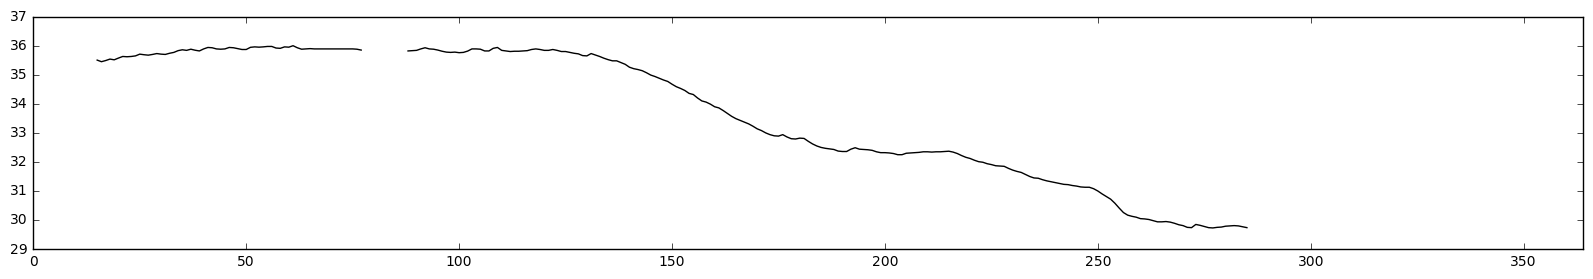

In [16]:
df['upperH_med'].plot(figsize=(20,3),color='k')

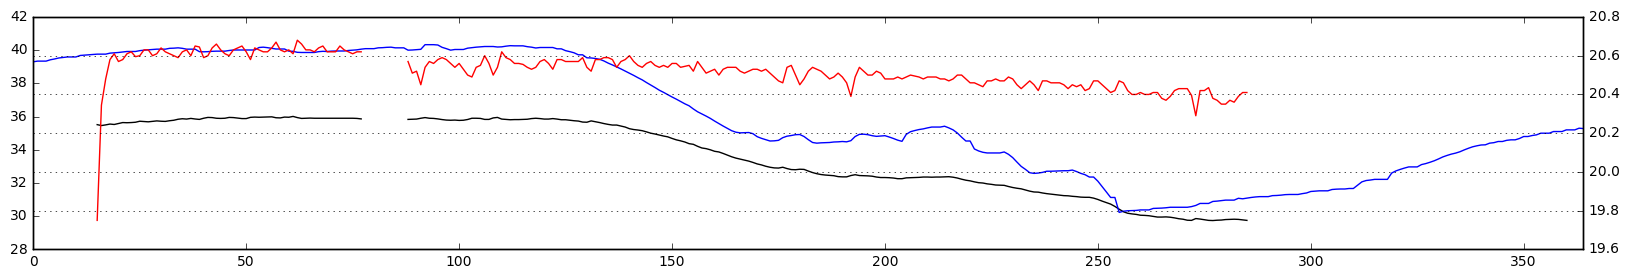

In [17]:

fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df['upperH_med'].plot(figsize=(20,3), ax=ax1, color='k')
df['reservoirH'].plot(figsize=(20,3), ax=ax1, color='b')
df['downH_med'].plot(figsize=(20,3), ax=ax1_1, color='r')
grid(True)

In [18]:
df.keys()

Index([u'date', u'reservoirH', u'upperH_med', u'downH_med', u'Rainfall (mm)',
       u'Temp (degree)', u'Moisture (percent)'],
      dtype='object')

2015-03-22 2015-03-22


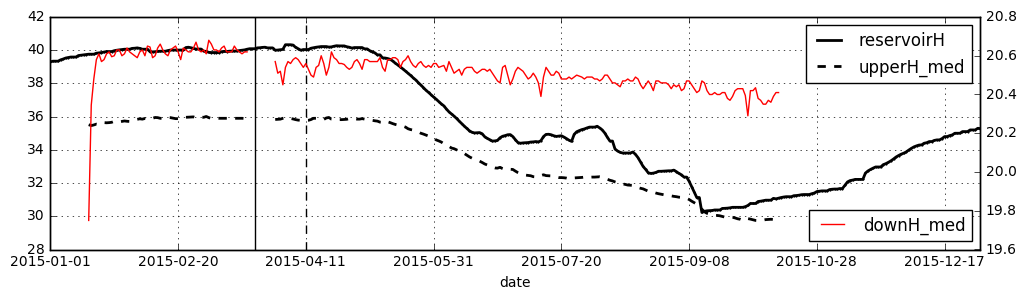

In [19]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1, color='k', linestyle='-', lw=2, marker='.', ms=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1, color='k', linestyle='--', lw=2)
df.plot(figsize=(12,3), x='date', y='downH_med', ax=ax1_1, color='r', linestyle='-')
ax1_1.legend(loc=4)
ax1.grid(True)
indst, indend = 80, 100
ax1.plot(np.r_[indst, indst], np.r_[28, 42], 'k-')
ax1.plot(np.r_[indend, indend], np.r_[28, 42], 'k--')
print df['date'].values[indst], df['date'].values[indst]
# ax1.set_ylim(39.5, 40.5)
# ax1.set_xlim(indst, indend)

2015-03-22 2015-03-22


(80, 100)

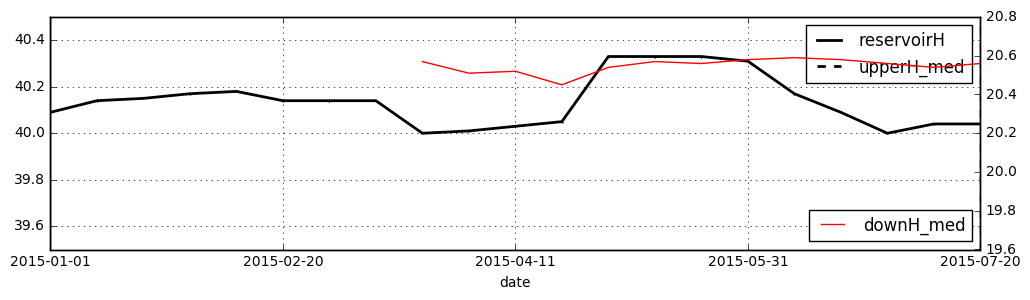

In [20]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1, color='k', linestyle='-', lw=2, marker='.', ms=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1, color='k', linestyle='--', lw=2)
df.plot(figsize=(12,3), x='date', y='downH_med', ax=ax1_1, color='r', linestyle='-')
ax1_1.legend(loc=4)
ax1.grid(True)
indst, indend = 80, 100
ax1.plot(np.r_[indst, indst], np.r_[28, 42], 'k-')
ax1.plot(np.r_[indend, indend], np.r_[28, 42], 'k--')
print df['date'].values[indst], df['date'].values[indst]
ax1.set_ylim(39.5, 40.5)
ax1.set_xlim(indst, indend)


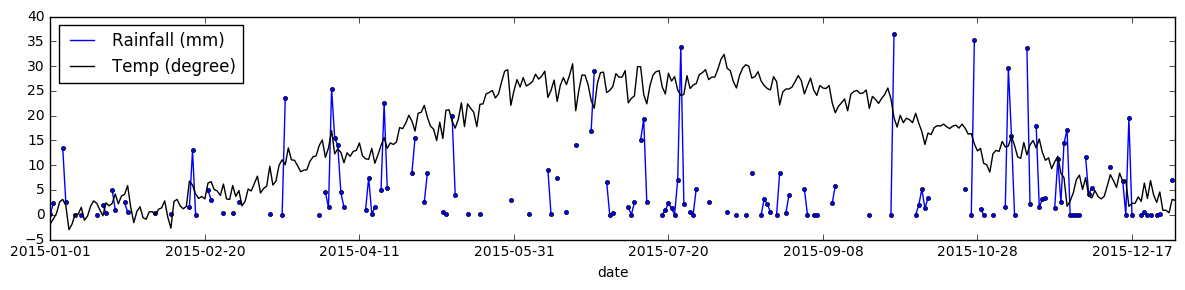

In [21]:
ax1 = plt.subplot(111)
df.plot(figsize=(12,3), x='date', y='Rainfall (mm)', ax=ax1, color='b', marker='o', linestyle="-", ms=3)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1, color='k', marker='None', linestyle="-", ms=3)
plt.tight_layout()

In [22]:
import sys
sys.path.append("../codes/")

from Readfiles import getFnames
from DCdata import readReservoirDC_data, readReservoirDC_all

directory = "../data/ChungCheonDC/"
fnames = getFnames(directory, dtype="apr", minimumsize=7000.)

In [23]:
import datetime
import numpy as np

In [24]:
def getdate(fstring):
    temp = fstring.split('.')[0]
    return datetime.date(int(temp[:4]), int(temp[4:6]), int(temp[6:8]))

In [25]:
date_temp = getdate(fnames[20])

In [26]:
date_temp.strftime("%Y-%m-%d")

'2015-01-06'

In [37]:
# for i in range (vals.size):
#     active = inds==i
#     upperh_med[i] = np.median(water23["upperlevel"].values[active])
#     downh_med[i] = np.median(water23["downlevel"].values[active])
#     upperh_std[i] = np.std(water23["upperlevel"].values[active])
#     downh_std[i] = np.std(water23["downlevel"].values[active])

In [45]:
dat_temp, htemp, ID = readReservoirDC_all(directory+fnames[0])
ID.append('date')
ID.append('fnames')
ntimes = len(fnames)
DATA = np.zeros((dat_temp.shape[0], ntimes))*np.nan
index = np.ones(ntimes, dtype='bool')
for i, fname in enumerate(fnames):
    dat_temp = readReservoirDC_data(directory+fname)
    if dat_temp.shape[0] == 380:        
        DATA[:,i] = dat_temp[:,-1]
    else:
        print fname,dat_temp.shape[0]
        index[i] = False

20150103180000.apr 379
20150106180000.apr 379
20150109120000.apr 379
20150112120000.apr 379
20150117120000.apr 379
20150120120000.apr 379
20150123120000.apr 379
20150126120000.apr 379
20150127000000.apr 379
20150129060000.apr 379
20150201000000.apr 379
20150204000000.apr 379
20150207000000.apr 379
20150209180000.apr 379
20150212180000.apr 379
20150215180000.apr 379
20150218120000.apr 379
20150221060000.apr 379
20150224120000.apr 379
20150227060000.apr 379
20150228000000.apr 379
20150302000000.apr 379
20150305000000.apr 379
20150308000000.apr 379
20150329000000.apr 379
20150401000000.apr 379
20150403180000.apr 379
20150404120000.apr 379
20150406180000.apr 379
20150409000000.apr 379
20150412120000.apr 379
20150415060000.apr 379
20150418000000.apr 379
20150421000000.apr 379
20150424000000.apr 379


382

In [48]:
fnameDC = np.array(fnames)[index]
datesDC = []
for i in range(fnameDC.size):
    tempdate = getdate(fnameDC[i])
    datesDC.append(tempdate.strftime("%Y-%m-%d"))
datesDC = np.array(datesDC)    

In [49]:
datesDC.size

1235

In [51]:
vals, inds = np.unique(datesDC, return_inverse=True)

In [52]:
DATA_active = DATA[:,index]
DATA_DC = np.zeros((vals.size,DATA.shape[0]))*np.nan
DATA_DC_std = np.zeros((vals.size,DATA.shape[0]))*np.nan
for i in range (vals.size):
    active = inds==i
    DATA_DC[i,:] = np.median(DATA_active[:,active], axis=1)
    DATA_DC_std[i,:] = np.std(DATA_active[:,active], axis=1)

In [53]:
actind = np.in1d(date, vals)
DATA_DC_final = np.zeros((365,DATA.shape[0]))*np.nan
DATA_DC_std_final = np.zeros((365,DATA.shape[0]))*np.nan
DATA_DC_final[actind,:] = DATA_DC
DATA_DC_std_final[actind,:] = DATA_DC_std

In [54]:
DATA_DC_final.shape

(365, 380)

In [56]:
date.shape

(365,)

In [57]:
DATA_DC_std_final.shape

(365, 380)

In [58]:
date.reshape([-1,1]).shape

(365, 1)

In [63]:
len(ID)

382

In [66]:
date

array(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
       '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
       '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
       '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
       '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
       '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
       '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-01',
       '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05',
       '2015-02-06', '2015-02-07', '2015-02-08', '2015-02-09',
       '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13',
       '2015-02-14', '2015-02-15', '2015-02-16', '2015-02-17',
       '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21',
       '2015-02-22', '2015-02-23', '2015-02-24', '2015-02-25',
       '2015-02-26', '2015-02-27', '2015-02-28', '2015-03-01',
       '2015-03-02', '2015-03-03', '2015-03-04', '2015-

In [71]:
len(ID)

382

In [72]:
DATA_DC_std_final.shape

(365, 380)

In [73]:
DATA_DC_std_final

array([[  9.18298256e-02,   7.69874827e-02,   7.48233378e-02, ...,
          3.05043804e-01,   1.81773931e-01,   1.35905213e+02],
       [  8.50574659e-02,   7.56067788e-02,   9.60450252e-02, ...,
          1.94220546e+00,   1.40502242e+00,   1.89762477e+02],
       [  6.71859278e-02,   8.57379470e-02,   9.64137381e-02, ...,
          1.45908860e-01,   6.85809862e-01,   2.74516171e+01],
       ..., 
       [  8.71684110e-02,   1.05531781e-01,   1.03264721e-01, ...,
          1.31353913e+00,   4.99144386e+00,   1.23894212e+00],
       [  4.95968497e-02,   1.04620538e-01,   8.48963302e-02, ...,
          1.80628758e+00,   5.63193710e+00,   1.60923984e+00],
       [  6.65027443e-02,   5.06216604e-02,   9.31773175e-02, ...,
          4.81908087e+00,   2.47336636e+00,   2.29587383e+00]])

In [76]:
df_DCstd = pd.DataFrame(data = np.hstack((DATA_DC_std_final, date.reshape([-1,1]))), columns=ID[:-1])
df_DCstd.set_index('date')
df_DC = pd.DataFrame(data = np.hstack((DATA_DC_final, date.reshape([-1,1]))), columns=ID[:-1])
df_DC.set_index('date')

,2134,3245,4356,5467,6578,7689,87910,981011,1091112,11101213,...,36354445,37364546,38374647,39384748,40394849,41404950,42415051,43425152,44435253,45445354
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,63.8435,66.0997,67.6907,89.4797,81.0441,76.8638,81.0903,69.4503,52.6298,88.1749,...,110.359,84.2553,96.4511,99.1321,82.5125,77.3529,75.411,70.7458,66.1388,151.8
2015-01-02,64.1266,66.3452,67.9904,89.9214,81.3556,76.9514,81.6516,69.8965,53.0818,88.5745,...,110.511,83.8233,96.3742,99.1411,82.5272,77.5084,77.3286,72.017,64.5944,196.191
2015-01-03,64.3166,66.5672,68.2552,90.2055,81.6469,77.0259,81.9475,70.4097,53.8211,88.8106,...,110.341,83.6864,96.2424,99.0359,82.4344,77.3507,76.9842,72.1312,64.6917,44.894
2015-01-04,38.6869,40.1053,41.1478,54.2852,49.2244,46.2452,49.6201,42.2292,31.949,53.561,...,66.4783,50.2957,58.0098,59.6831,49.6465,47.0133,48.41,43.7154,35.1429,76.8739
2015-01-05,12.9201,13.4114,13.7671,18.1572,16.4497,15.4797,16.6515,14.0976,10.6175,17.9115,...,22.1307,16.7422,19.3394,19.8717,16.5371,15.86,16.3996,14.2587,11.8562,82.6108
2015-01-06,64.7369,67.1685,69.5709,90.8841,82.2246,78.0032,84.0822,70.3324,52.3622,89.8379,...,110.265,84.5889,97.2581,99.5777,83.0315,81.6846,83.4658,68.4341,58.0133,83.7678
2015-01-07,64.6879,67.2001,69.7287,91.091,80.5328,80.3128,84.07,70.4582,52.4744,89.7672,...,109.711,84.5996,97.1693,98.7176,82.8042,77.5627,74.5962,70.3918,66.4746,81.434
2015-01-08,64.7544,67.2778,69.9757,91.4985,80.6563,80.751,84.0332,70.6868,52.874,90.0406,...,109.484,84.7348,97.2603,98.5581,82.9535,77.5061,72.8522,70.3584,65.4076,80.8098
2015-01-09,64.8425,67.4371,70.1505,91.7709,81.0182,81.4423,83.7561,70.6971,52.9531,90.427,...,109.374,85.1872,97.3056,98.6344,82.9207,78.1717,101.677,85.0221,60.6745,68.1954


In [77]:
df.to_csv("../data/ChungCheonDC/CompositeETCdata.csv")
df_DC.to_csv("../data/ChungCheonDC/CompositeDCdata.csv")
df_DCstd.to_csv("../data/ChungCheonDC/CompositeDCstddata.csv")